Hola **Cesar**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

## Preparación

In [4]:
#Abrimos el df estableciendo como indice la columa 0 y convirtiendola a tipo date
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates = [0])
#Revisamos duplicados en el indice y valores faltantes
duplicated = df.index.duplicated()
na = df.isna()
print('Filas duplicadas:\n', duplicated.sum())
print()
print('Filas con valores NA:\n', na.sum())
print()
print(df.head())

Filas duplicadas:
 0

Filas con valores NA:
 num_orders    0
dtype: int64

                     num_orders
datetime                       
2018-03-01 00:00:00           9
2018-03-01 00:10:00          14
2018-03-01 00:20:00          28
2018-03-01 00:30:00          20
2018-03-01 00:40:00          32


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB
None


In [6]:
#Ordenamos el df en orden cronológico
df.sort_index(inplace=True)
#Remuestramos los datos originales por hora
df_h = df.resample('1H').sum()
print(df_h.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB
None


<AxesSubplot:xlabel='datetime'>

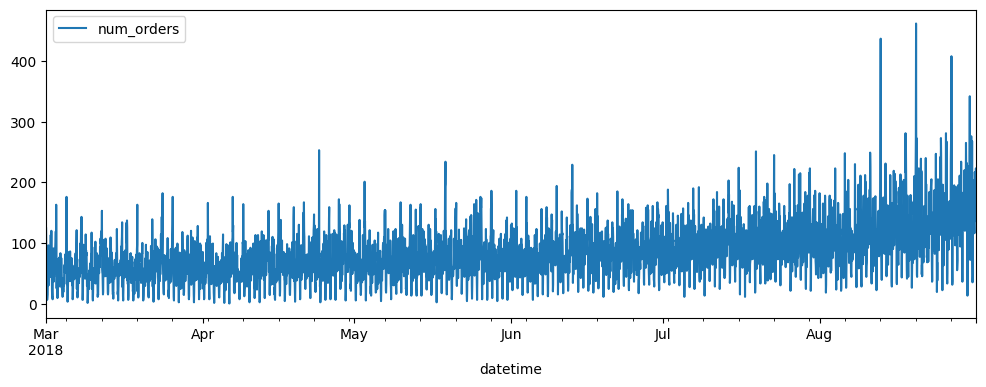

In [7]:
#Trazamos el gráfico del numero de taxis ordenados por hora
df_h.plot(figsize=(12, 4))

## Análisis

<AxesSubplot:title={'center':'Pedidos y media móvil (24h)'}, xlabel='datetime'>

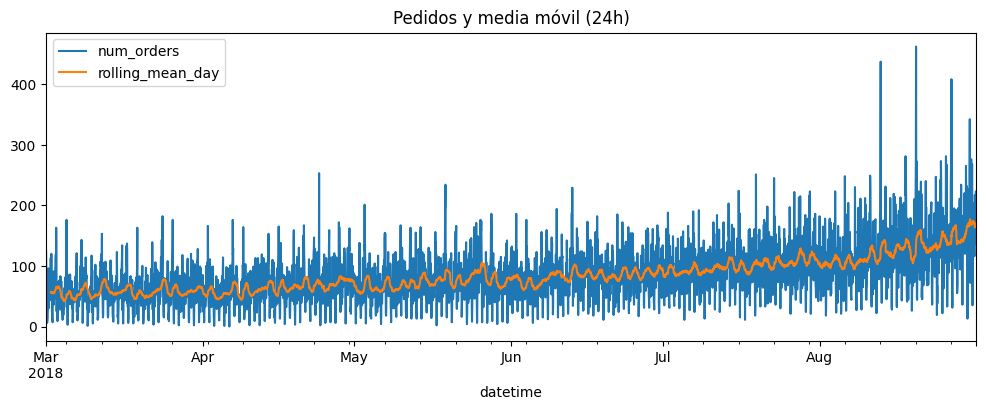

In [8]:
#Utilizamos la media movil para reducir las fluctuaciones de la serie temporal
df_h['rolling_mean_day']= df_h['num_orders'].rolling(24).mean()

#Gráficamos resultados
df_h.plot(figsize=(12, 4), title='Pedidos y media móvil (24h)')


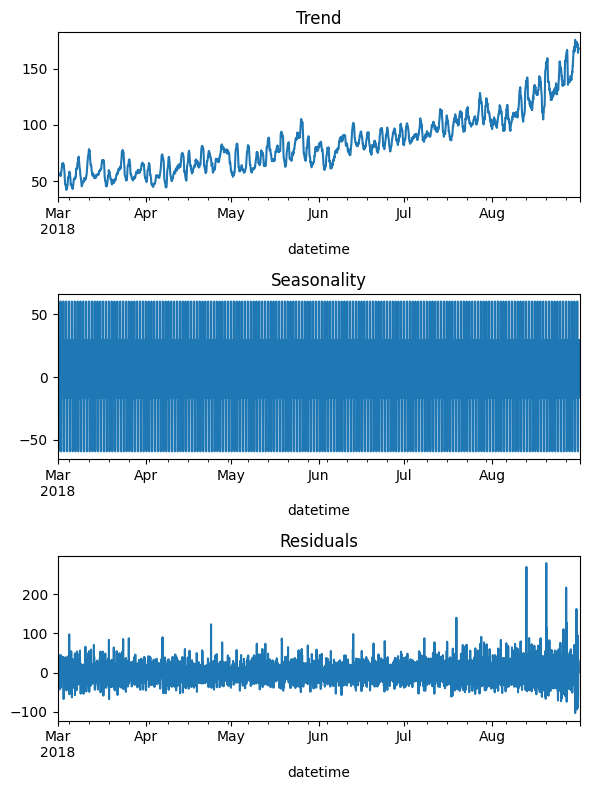

In [9]:
#Descomponemos la serie temporal para momostrar la tendencia, estacionalidad y residuos
decomposed = seasonal_decompose(df_h['num_orders'], period = 24)

plt.figure(figsize=(6, 8))
#Tendencia
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
#Estacionalidad
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
#Residuos
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<AxesSubplot:title={'center':'Estacionalidad (1 mes)'}, xlabel='datetime'>

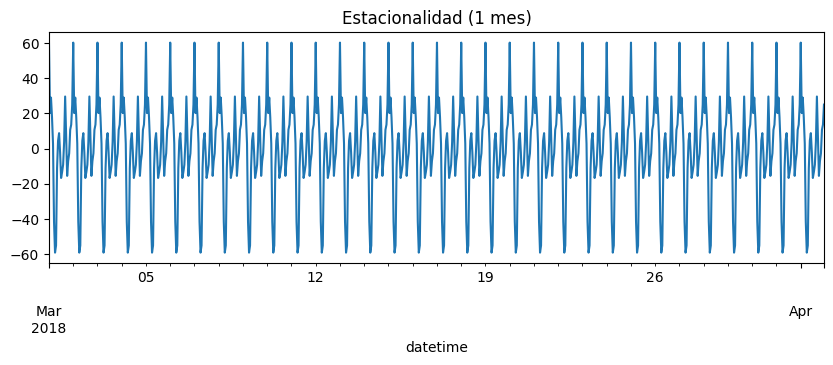

In [10]:
#Mostraremos la estacionalidad de 1 mes para mejor visualización
decomposed.seasonal['2018-03-01':'2018-04-01'].plot(figsize=(10, 3), title='Estacionalidad (1 mes)')

**Observaciones**

- Se muestra una tendencia creciente desde marzo a abril, mostrandose un claro incremento en los pedidos de taxis. 

- Hay un patrón estable que se repite todos los días durante todo el periodo analizado; por lo que podemos decir que hay estacionalidad.

- Los residuos se oncentran alrededor del cero y muestran una varianza baja.


array([<AxesSubplot:title={'center':'Diferencia 1 hora'}, xlabel='datetime'>,
       <AxesSubplot:title={'center':'Diferencia diaria'}, xlabel='datetime'>,
       <AxesSubplot:title={'center':'diferencia semanal'}, xlabel='datetime'>],
      dtype=object)

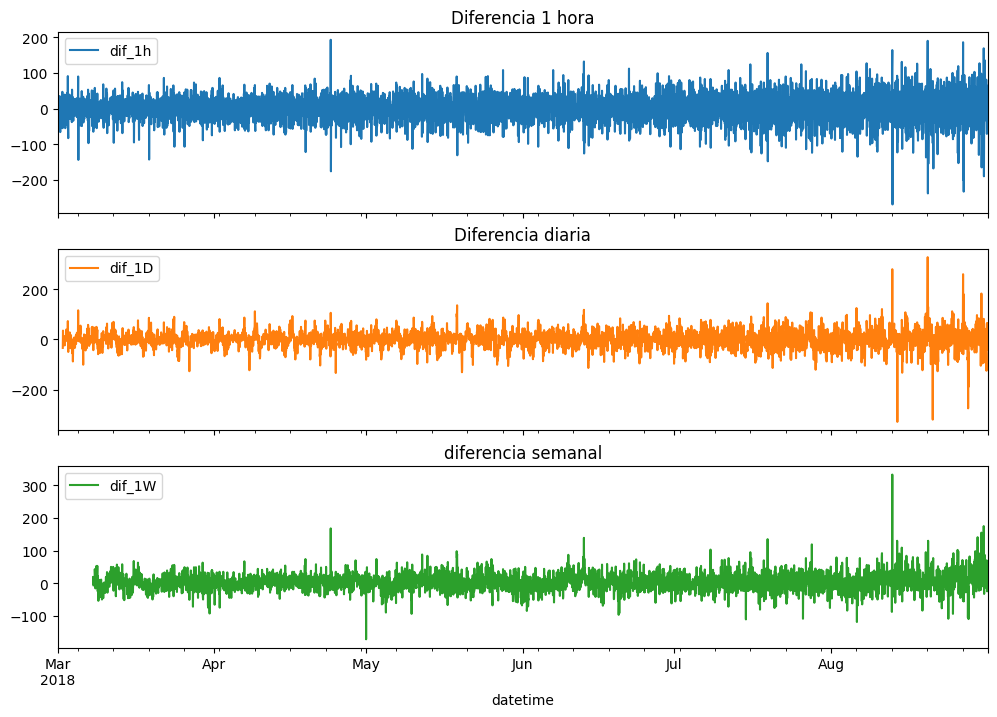

In [11]:
#Volvemos estacionaria la series temporales
df_h['dif_1h'] = df_h['num_orders'] - df_h['num_orders'].shift(1)
df_h['dif_1D'] = df_h['num_orders'] - df_h['num_orders'].shift(24)
df_h['dif_1W'] = df_h['num_orders'] - df_h['num_orders'].shift(168)
#Mostramos los resultados
df_h[['dif_1h', 'dif_1D', 'dif_1W']].plot(subplots=True, figsize=(12, 8), title=['Diferencia 1 hora', 'Diferencia diaria', 'diferencia semanal'])

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las gráficas! Generaste las gráficas adecuadas considerando que los datos a analizar son sobre series temporales
</div>

## Formación

In [12]:
#Creamos la función make_features
def make_features(df_h, lags = [1, 2, 24, 168], rolling_window = 24):
    df_hc = df_h.copy()
    
    df_hc['hour'] = df_hc.index.hour
    df_hc['dayofweek'] = df_hc.index.dayofweek
    
    #Generamos variables resagadas que ayuden a predecir el valor futuro
    for lag in lags:
        df_hc[f'lag_{lag}'] = df_hc['num_orders'].shift(lag)
        
    #Creamos la media movil diaria útil para hacer los modelos  
    df_hc['rolling_mean_day_model']= df_hc['num_orders'].shift().rolling(rolling_window).mean()

    #Eliminamos las filas vacías
    df_final = df_hc.dropna()

    return df_final

In [13]:
df_features = make_features(df_h)
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2018-03-08 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_orders              4248 non-null   int64  
 1   rolling_mean_day        4248 non-null   float64
 2   dif_1h                  4248 non-null   float64
 3   dif_1D                  4248 non-null   float64
 4   dif_1W                  4248 non-null   float64
 5   hour                    4248 non-null   int64  
 6   dayofweek               4248 non-null   int64  
 7   lag_1                   4248 non-null   float64
 8   lag_2                   4248 non-null   float64
 9   lag_24                  4248 non-null   float64
 10  lag_168                 4248 non-null   float64
 11  rolling_mean_day_model  4248 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 431.4 KB
None


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, realizaste los ajustes de las características en el dataset de manera adecuada para obtener un buen desempeño en los entrenamientos
    
</div>

# Duda
Para dividir los datos en train y test usamos train_test_split, sin embargo leeí que es mejor practica dividir conn .iloc. para dejar explicito que estas separando el pasado y el futuro.

In [14]:
#Dividimos los datos
train_size = int(len(df_features)*.90)
train = df_features.iloc[:train_size]
test = df_features.iloc[train_size:]

In [15]:
#Nos aseguramos de que la división de train y test se haya realizado de forma correcta
print("Entrenamiento", train.index.min(), "→", train.index.max())
print("Prueba", test.index.min(), "→", test.index.max())

Entrenamiento 2018-03-08 00:00:00 → 2018-08-14 06:00:00
Prueba 2018-08-14 07:00:00 → 2018-08-31 23:00:00


In [16]:
#Excluimos variables no útiles para el modelo y a 'rolling_mean_day' para evitar fuga de datos
features = [col for col in df_features.columns
           if col not in ['num_orders', 'rolling_mean_day', 'dif_1h', 'dif_1D', 'dif_1W']]

#División de datos
x_train = train[features]
y_train = train['num_orders']
x_test = test[features]
y_test = test['num_orders']


**Modelo de Regresión Lineal**

In [17]:
#Creamos modelo y entrenamos LinearRegression
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

**Modelo Random Forest Regressor**

In [18]:
params_list = [
    {'n_estimators': 50,  'max_depth': 5},
    {'n_estimators': 100, 'max_depth': 10},
    {'n_estimators': 200, 'max_depth': 20},
]
#Creamos modelo y entrenamos RandomForestRegressor y buscamos la mejor combinación
for params in params_list:
    model_rf = RandomForestRegressor(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        random_state=1
    )
    model_rf.fit(x_train, y_train)
    pred_rf = model_rf.predict(x_test)
    rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
    
    print(f"n_estimators={params['n_estimators']}, max_depth={params['max_depth']} → RMSE: {round(rmse_rf, 2)}")

n_estimators=50, max_depth=5 → RMSE: 45.42
n_estimators=100, max_depth=10 → RMSE: 43.42
n_estimators=200, max_depth=20 → RMSE: 43.65


**Modelo ARIMA**

In [19]:
# Usamos solo la columna 'num_orders' para este modelo
series_train = train['num_orders']
series_test = test['num_orders']

# Entrenamos ARIMA
model_arima = ARIMA(series_train, order=(2, 1, 2))  # ver valores anteriores, vuelve la serie estacionaria , toma en cuenta errores
model_fit = model_arima.fit()

## Prueba

In [20]:
#Probamos los datos del modelo LinearRegression
pred_lr = model_lr.predict(x_test)
rmse_lr = sqrt(mean_squared_error(y_test, pred_lr))
print("RMSE del modelo de Regresión Lineal:", round(rmse_lr,2))

RMSE del modelo de Regresión Lineal: 35.04


In [21]:
#Probamos los datos del modelo RandomForestRegressor con los mejores parametros
model_rf_best = RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=1)
model_rf_best.fit(x_train, y_train)
pred_rf_best = model_rf_best.predict(x_test)
rmse_rf_best = sqrt(mean_squared_error(y_test, pred_rf_best))
print("RMSE del modelo de Regresión Lineal:", round(rmse_rf_best,2))

RMSE del modelo de Regresión Lineal: 43.42


In [22]:
# Hacemos predicciones para el mismo número de pasos que hay en el conjunto de prueba
pred_arima = model_fit.forecast(steps=len(series_test))

# Evaluamos el resultado de ARIMA
rmse_arima = sqrt(mean_squared_error(series_test, pred_arima))
print("RMSE del modelo ARIMA:", round(rmse_arima,2))

RMSE del modelo ARIMA: 64.32


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente, lograste con varios modelos obtener una métrica de RMSE por debajo de lo requerido para este proyecto lo que indica que lograste obtener un muy buen desempeño de tus modelos para predecir datos relacionados a series temporales!
</div>

**Graficamos resultados**

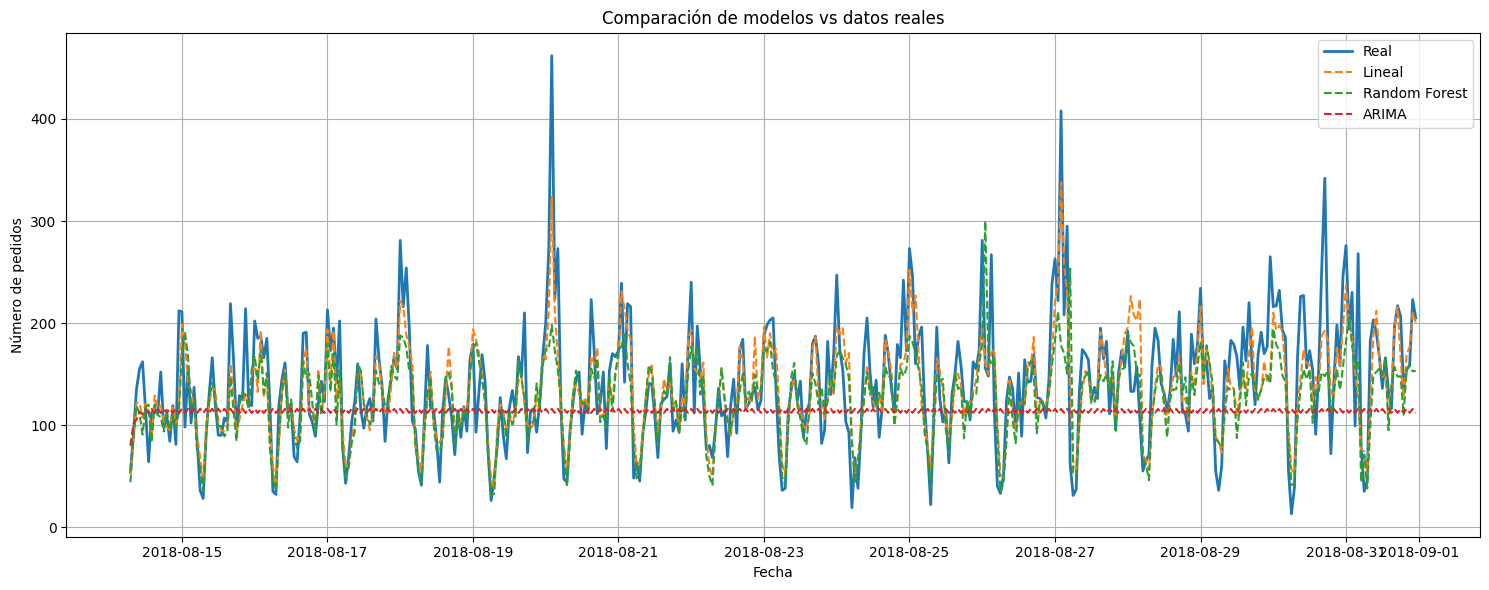

In [27]:
#Graficamos un segmento de 2 semanas para observar el comportamiento de las predicciones en esa semana 
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Real', linewidth=2)
plt.plot(y_test.index, pred_lr, label='Lineal', linestyle='--')
plt.plot(y_test.index, pred_rf_best, label='Random Forest', linestyle='--')
plt.plot(y_test.index, pred_arima, label='ARIMA', linestyle='--')
plt.title("Comparación de modelos vs datos reales")
plt.xlabel("Fecha")
plt.ylabel("Número de pedidos")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
results = []

results.append({
    "Modelo": "Linear Regression",
    "RMSE": rmse_lr})

results.append({
    "Modelo": "Random Forest Regressor",
    "RMSE": rmse_rf_best})

results.append({
    "Modelo": "ARIMA",
    "RMSE": rmse_arima})

# Convertimos a DataFrame para presentar los resultados finales
df_results = pd.DataFrame(results)
display(df_results.sort_values("RMSE"))

,Modelo,RMSE
0,Linear Regression,35.043551
1,Random Forest Regressor,43.420764
2,ARIMA,64.323307


# Conclusiones
- El modelo de regresión lineal es el más adecuado para predecir la cantidad de pedidos de taxis para la próxima hora; pues tiene el RMSE más bajo de **35.04**.
- El modelo Random Forest Regression también mostró buenos resultados aunque con un RMSE mayor de **43.42** con n_estimators=100 y max_depth=10.
- ARIMA no mostró resultados apropiados con RMSE de **64.32**.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito por el trabajo realizado Cesar, aplicaste los procesos adecuados al dataset para darle características nuevas al modelo, con ese proceso aportas significativamente al desempeño del mismo y obtuviste una métrica que supera lo propuesto para este proyecto, continúa con este gran trabajo!
    
   
Este proyecto es uno donde se ve claramente la importancia de darle características o variables adecuadas a los modelos para obtener un correcto desempeño, si quitas o pones más variables el desempeño del modelo variará para bien o para mal según la calidad de las mismas. Saludos!
</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48